#Project 4 - Problem 1 (Python)
###Intro to Data Science
######*Chris Nolan*

1.Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csvLinks to an external site.

In [4]:
# Let's read in the data file

import pandas as pd

training_data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

training_data.info()

#Check for missing values before we start
print("\nThere are this many missing values:\n",training_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB

There this many missing values:
 age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
income            0
dtype: int64


2.Create a contingency table of workclass and sex, and plot it.

In [4]:
pd.crosstab(training_data['workclass'], training_data['sex'], margins=False)

sex,Female,Male
workclass,,
?,377,452
Federal-gov,149,305
Local-gov,377,592
Never-worked,1,4
Private,3574,6707
Self-emp-inc,54,444
Self-emp-not-inc,178,992
State-gov,201,385
Without-pay,1,4


3.Create a contingency table of sex and marital status, and plot it.

In [7]:
pd.crosstab(training_data['sex'], training_data['marital-status'], margins=False)

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,1219,7,761,95,2160,290,380
Male,795,4,6010,104,2717,182,73


4.Create a new data frame, adultOver40, for those whose age > 40.

In [14]:
adultsOver40=pd.DataFrame({'sex':[],'marital_status': []})

for age in training_data['age']:
  if age > 40:
    adultsOver40['sex'] = training_data['sex']
    adultsOver40['marital_status'] = training_data['marital-status']


5.Recreate the contingency table of sex and marital status for adultOver40.

In [16]:
pd.crosstab(adultsOver40['sex'], adultsOver40['marital_status'], margins=False)

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,1219,7,761,95,2160,290,380
Male,795,4,6010,104,2717,182,73


6.Determine whether any outliers exist for the education field.

In [22]:
from scipy import stats

training_data['scaled_education'] = stats.zscore(training_data.education, nan_policy='omit')

training_data_outliers = training_data.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

print("There are",training_data_outliers.count(), "outliers")

There are 113 outliers


7.Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [28]:
from scipy import stats

training_data['scaled_age'] = stats.zscore(training_data.age, nan_policy='omit')

training_data_outliers = training_data.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

print("There are",training_data_outliers.count(), "outliers")
print("There max outlier is",training_data_outliers.max())

There are 60 outliers
There max outlier is 3.7513537300721516


8.Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.

<Axes: >

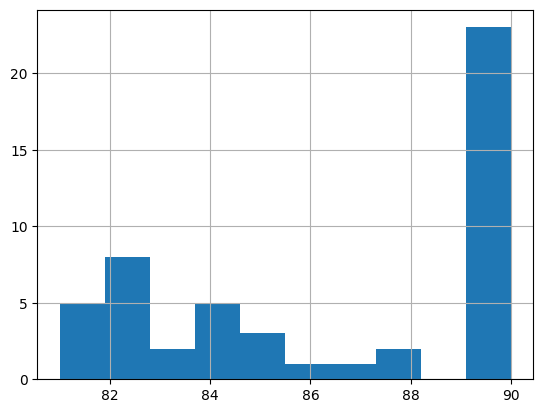

In [29]:
over80=training_data.query('age > 80')['age']

over80.hist()

After looking at the histogram it seems that there are a big group of people who are between the ages of 80 - 82 and 89 - 90 with very few ages in the middle.

9.Summarize your findings.\
After looking at all the data I was very interested by the comparison between the relationship status and gender. For Married-civ-spouse there was a lot more men in that catagory than women, the opposite of this can be said for widowed where there is almost 3 times more widowed women than men. I wonder what the cause for the huge differences in gender of these two catagories could be. Something else I also noticed is that I liked using R more than python for some of the steps and the opposite for others.